In [1]:
%cd /content/drive/MyDrive/Schools/ASP/Paper2022/Ghana/

/content/drive/.shortcut-targets-by-id/1-3ubs0qckwjzql74AITGova2ubuNKi7u/Paper2022/Ghana


In [2]:
%ls

Gh4ASP2022.csv       Ghana-Figure1-V.png     GoodnessVacGhana-V.png        SIDARTHE-V-GH.ipynb
Ghana-Figure1-V.pdf  GoodnessVacGhana-V.pdf  ModelingOfCOVID19Ghana-V.png


In [3]:
# SIDARTHE-VModel_ASP_final.py
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 27 10:01:00 2021

@author: kossi
"""

#Library
import matplotlib.pyplot as plt
from numpy import exp, linspace, random
from scipy.optimize import curve_fit
from scipy import integrate, optimize
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.gridspec as gridspec



def SIDARTHE_model(y, t,N, alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,\
                   theta,mu,kappa,nu,chi,sigma,taub,taua, phi, alpha_p):
    ### Defines the PDEs that caracterized the desease
    S = y[0]   #Succeptible
    I = y[1]   #Infected asymptomatic undetected
    D = y[2]   #Diagnosed asymptomatic infected detected
    A = y[3]   #Ailing symptomatic infected undetected
    R = y[4]   # Recognised symptomatic infected detected
    T = y[5]   #Treathened accutely symptomatic infected detected
    H = y[6]   # Healed
    E = y[7]   # Extinct (deads)
    V = y[8]
    U = y[9]
    return [-S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R) - phi(t)*S,
            S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R) + alpha_p(t)*I*V-(epsilon(t)+lamda(t)+zeta(t))*I,
            epsilon(t)*I-(eta(t)+rho(t))*D,
            zeta(t)*I-(theta(t)+mu(t)+kappa(t))*A,
            eta(t)*D +theta(t)*A-(taua(t) + nu(t) + chi(t))*R,
            mu(t)*A+nu(t)*R-(sigma(t)+taub(t))*T,
            lamda(t)*I +rho(t)*D + kappa(t)*A  + sigma(t)*T +chi(t)*R,
            taua(t)*R + taub(t)*T,
            - alpha_p(t)*V*I + phi(t)*S,
            lamda(t)*I]


def getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0):
    r1=epsilon+lamda+zeta
    r2=eta+rho;
    r3=theta+mu+kappa;
    r4=nu+taua+chi;
    r5=sigma+taub;
    #R0_primemisure
    r0 = S *(alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)+delta*zeta*theta/(r1*r3*r4)) + V*alpha_p/r1
    return r0

def rzero( t,par):
    global r0, plottato, plottato1, plottato2, plottato3, plottato4, plottato5, plottato6, plottato7, plottato8, plottato9
    global ctrl_R0, ctrl_R1, ctrl_R2, ctrl_R3, ctrl_R4, ctrl_R5, anomaly0, anomaly1, plottato_ano, plottato_ano1
    global ctrl_R6, ctrl_R7, ctrl_R8, ctrl_R9, ctrl_R8_m, ctrl_R8_p, plottato_R8m, plottato_R8p
    global ctrl_R9, ctrl_R10, ctrl_R11 , plottato10, plottato11, plottato12, plottato13, plottato14, plottato15, plottato16
    global ctrl_R13_1, ctrl_R13_2,ctrl_R13_3, ctrl_R13_4, ctrl_R13_5, ctrl_R13_6, plottato13_1, plottato13_2, plottato13_3, plottato13_4, plottato13_5, plottato13_6
    global ctrl_R14_1, ctrl_R14_2, plottato14_1, plottato14_2
    global ctrl_R16, plottato16
    global ctrl_R17, ctrl_R18, ctrl_R19, ctrl_R20, ctrl_R21, ctrl_R22, ctrl_R23, ctrl_R24, ctrl_R25, ctrl_R26
    global ctrl_R27, ctrl_R28, ctrl_R29, ctrl_R30, ctrl_R31, ctrl_R32, ctrl_R33, ctrl_R34, ctrl_R35, ctrl_R36,ctrl_R37, ctrl_R38, ctrl_R39, ctrl_R40
    global pass17, pass18, pass19, pass20, pass21, pass22, pass23, pass24, pass25, pass26, pass27, pass28, pass29, pass30
    global pass31, pass32, pass33, pass34, pass35, pass36, pass37, pass38, pass39, pass40
    global x1dose_start, vaccine_on
    ###--------> Change the parameters values with your own
    if t >= 0: # 400 corresponds to the time the vaccination has started
        taua = 0.000
        phi = 0.000
        alpha_p = 0.00

    if (t >= ctrl_R0 ) and (t < ctrl_R1):
        alpha= 0.8000#; //0.8, 0.5; I
        gamma= 0.9000#; //0.9, 0.5; A
        beta = 0.5000#; //0.5, 0.3; D
        delta= 0.3000#; //0.3; R

        epsilon = 0.2500#;   // epsilon: Detection rate for ASYMPTOMATIC
        theta   = 0.4300#;0.37  // theta: Detection rate for ASYMPTOMATIC

        mu = 0.0200#0.2;  // mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.3000#;  // nu: Worsening rate: DETECTED symptomatic infected develop life-threatening

        zeta = 0.3200#0.32;  // zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        eta  = 0.3200#;  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic

        lamda=0.0001#; //0.08;

        rho=0.0000#;
        kappa=0.0000#;
        chi=0.0000#;
        sigma=0.000000#;

        taub = 0.000000#;

       # Compute the new R0
        if (plottato == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato = 1;


    if (t >= ctrl_R1 ) and (t < ctrl_R2):
        alpha= 0.1800#; //0.8, 0.5; I
        gamma= 0.5000#; //0.9, 0.5; A
        beta = 0.0240#; //0.5, 0.3; D
        delta= 0.0241#; //0.3; R

        epsilon = 0.2500#;   // epsilon: Detection rate for ASYMPTOMATIC
        theta   = 0.4300#;0.37  // theta: Detection rate for ASYMPTOMATIC

        mu = 0.2000#;  // mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.3000#;  // nu: Worsening rate: DETECTED symptomatic infected develop life-threatening

        zeta = 0.3200#0.32;  // zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        eta  = 0.0120#0.32;  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic

        lamda=0.0001#; //0.08;

        rho=0.0003#;
        kappa=0.0001#;
        chi=0.0002#;
        sigma=0.000000#;

        taub = 0.045000#;

        if (plottato1 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato1 = 1;


    if (t >= ctrl_R2 ) and (t < ctrl_R3):# III
        alpha= 0.3000#0.8#0.30#; //07 0.8, 0.5; I
        gamma= 0.7000#0.760#;07 //08 0.9, 0.5; A
        beta =0.2500# 0.35#;025 //0.5, 0.3; D
        delta= 0.2500#0.5#;025 //05 0.3; R

        zeta = .6200#0.3#0.62#;  // zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        epsilon = .6500#0.85#0.65;   // epsilon: Detection rate for ASYMPTOMATIC

        eta  = 0.9500#;  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic
        theta   = 0.8300#03;0.37  // theta: Detection rate for ASYMPTOMATIC


        mu = 0.2000#0.2;  // mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.3000#;  // nu: Worsening rate: DETECTED symptomatic infected develop life-threatening

        lamda=0.0001#; //0.08;

        rho=0.0004#;
        kappa=0.001#;
        chi=0.0071#;0.0151
        sigma=0.001000#;

        taub = 0.007700#;


        if (plottato2 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato2 = 1;


    if (t >= ctrl_R3 ) and (t < anomaly0): #IV-1
        alpha= 0.1000#0.3# I
        gamma= .4300#0.7# A
        beta =.2000#0.25#  D
        delta= 0.2500#  R

        zeta = .6200#0.3#0.62#;  // zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        epsilon = .6500#0.85#0.65;   // epsilon: Detection rate for ASYMPTOMATIC

        eta  = 0.9500#;  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic
        theta   = 0.8300#03;0.37  // theta: Detection rate for ASYMPTOMATIC


        mu = 0.2000#0.2;  // mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.3000#;  // nu: Worsening rate: DETECTED symptomatic infected develop life-threatening

        lamda=0.0001#; //0.08;

        rho=0.0004#;
        kappa=0.0010#;
        chi=0.0012#;0.0151
        sigma=0.000100#;

        taub = 0.000372#;


        if (plottato3 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato3 = 1;


    if (t >= anomaly0 ) and (t < anomaly1): #IV-2
        alpha= 0.1000#0.3# I
        gamma= .4300#0.7# A
        beta =.2000#0.25#  D
        delta= 0.2500#  R


        zeta = .6200#0.3#0.62#;  // zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        epsilon = .6500#0.85#0.65;   // epsilon: Detection rate for ASYMPTOMATIC

        eta  = 0.9500#;  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic
        theta   = 0.8300#03;0.37  // theta: Detection rate for ASYMPTOMATIC


        mu = 0.2000#0.2;  // mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.3000#;  // nu: Worsening rate: DETECTED symptomatic infected develop life-threatening

        lamda=0.0001#; //0.08;

        rho=0.0004#;
        kappa=0.0910#;
        chi=0.5947#;0.0151
        sigma=0.000100#;

        taub = 0.000372#;

       # Compute the new R0
        if (plottato_ano == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato_ano = 1;
            #r0 = R0_primemisure;

    if (t >= anomaly1 ) and (t < ctrl_R4): #IV-3
        alpha= 0.5431#0.3# I
        gamma= .8643#0.7# A
        beta =.4320#0.25#  D
        delta= 0.2500#  R

        zeta = .6200#0.3#0.62#;  // zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        epsilon = .6500#0.85#0.65;   // epsilon: Detection rate for ASYMPTOMATIC

        eta  = 0.9500#;  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic
        theta   = 0.8300#03;0.37  // theta: Detection rate for ASYMPTOMATIC


        mu = 0.2000#0.2;  // mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.3000#;  // nu: Worsening rate: DETECTED symptomatic infected develop life-threatening

        lamda=0.0001#; //0.08;

        rho=0.0004#;
        kappa=0.0011#0.081#;
        chi=0.0210#0.00114711#;0.0151
        sigma=0.000100#;

        taub = 0.000370#;


        if (plottato_ano1 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato_ano1 = 1;


    if (t >= ctrl_R4 ) and (t < ctrl_R5): #V
        alpha= 0.5000#0.3# I
        gamma= .5000#0.7# A
        beta =.1000#0.25#  D
        delta= 0.1000#  R

        zeta = .6200#0.3#0.62#;  // zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        epsilon = .6500#0.85#0.65;   // epsilon: Detection rate for ASYMPTOMATIC

        eta  = 0.9500#;  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic
        theta   = 0.8300#03;0.37  // theta: Detection rate for ASYMPTOMATIC


        mu = 0.2000#0.2;  // mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.3000#;  // nu: Worsening rate: DETECTED symptomatic infected develop life-threatening

        lamda=0.0001#; //0.08;

        rho=0.0400#;
        kappa=0.2081#;
        chi=0.0012#;0.0151
        sigma=0.000100#;

        taub = 0.000612#;

       # Compute the new R0
        if (plottato4 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato4 = 1;


    if (t >= ctrl_R5 ) and (t < ctrl_R6): #VI
        alpha= .5450#0.5# I ## Exp increase affect recovered
        gamma= .7065#0.65# A ## Exp increase affect recovered
        beta =.4000#0.4#  D ## EXP GROW
        delta= 0.1000#0.1  R ## PULL FORWARD the graph

        epsilon = 0.6570#; FLAT ACTIFS AND RECOVERED, remove exp grow
        theta   = 0.5837#;

        mu = 0.2000#;  //
        nu = 0.3000#;  //

        zeta = 0.8543# = EPSILON
        eta  = 0.7632# FLAT ACTIFS RECOV

        lamda=0.0001#; //0.08;

        rho=0.0864#; D <-- reduce for a better fitting IN ZONE VI
        kappa=0.0810#; A
        chi=0.0115#;0.00151 <-- reduce for a better fitting
        sigma=0.005100#;

        taub = 0.000212# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato5 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato5 = 1;

    if (t >= ctrl_R6 ) and (t < ctrl_R7): #VII
        alpha= .3631#.0605#0.3# I ## Exp increase affect recovered
        gamma= .7641#.12#0.7# A ## Exp increase affect recovered
        beta =.2340#.004#0.25#  D ## EXP GROW
        delta= 0.0210#0.01#  R ## PULL FORWARD the graph

        epsilon = 0.6570#; FLAT ACTIFS AND RECOVERED, remove exp grow
        theta   = 0.5837#;  // theta: Detection rate for ASYMPTOMATIC

        mu = 0.2000#;  //
        nu = 0.3000#;  //

        zeta = 0.4320# = EPSILON
        eta  = 0.7632# FLAT ACTIFS RECOV

        lamda=0.0001#; //0.08;

        rho=0.1840#.0864#;.384 D
        kappa=0.4810#.081#; A
        chi=0.2303#.0114711#;0.00114711
        sigma=0.000810#.0051#;

        taub = 0.000212# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato6 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato6 = 1;

    if (t >= ctrl_R7 ) and (t < ctrl_R8): #VIII_1
        alpha= 0.5300#0.3# I
        gamma= .8769#0.7# A
        beta =.4371#0.25#  D
        delta= 0.1610#  R

        zeta = .6200#0.3#0.62#;  // zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        epsilon = .6215#0.85#0.65;   // epsilon: Detection rate for ASYMPTOMATIC

        eta  = 0.7500#;  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic
        theta   = 0.6300#03;0.37  // theta: Detection rate for ASYMPTOMATIC


        mu = 0.7200#0.2;  // mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.7530#;  // nu: Worsening rate: DETECTED symptomatic infected develop life-threatening

        lamda=0.0001#; //0.08;

        rho=0.1040#;
        kappa=0.1081#;
        chi=0.0012#;0.0151
        sigma=0.013041#;

        taub = 0.000231# CHNAGE DEATH ONLY


       # Compute the new R0
        if (plottato7 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato7 = 1;


    if (t >= ctrl_R8 ) and (t < ctrl_R9): #IX
        alpha= .3151#.0605#0.3# I ## Exp increase affect recovered
        gamma= .4131#.61312#.12#0.7# A ## Exp increase affect recovered
        beta =.2304#.004#0.25#  D ## EXP GROW
        delta= 0.0014#0.01#  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        epsilon = 0.5140#0.27305#; FLAT ACTIFS AND RECOVERED, remove exp grow
        theta   = 0.3000#;  // theta: Detection rate for ASYMPTOMATIC

        mu = 0.2000#;  //
        nu = 0.3000#;  //

        zeta = 0.2000# = EPSILON
        eta  = 0.3200# FLAT ACTIFS RECOV

        lamda=0.0001#; //0.08;

        rho=.67289#change only Act and Inf no effect on H. Flatten the curve D
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.
        kappa=0.5100 #0.81 A
        chi=0.0053#0.00314711 #  AFFECTS MORE Act THAN H. Remove the exp in Act but concave the curve
        sigma=0.024219#.0051#;     AFFECTS CONSIDERABLY ACTIFS because it reduces R

        taub = 0.000865#
       # Compute the new R0
        if (plottato_R8p == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato_R8p = 1;

    if (t >= ctrl_R9 )and (t < ctrl_R10): #X############################################################
        alpha= .5583#.0605#0.3# I ## Exp increase affect recovered
        gamma= .7595#.12#0.7# A ## Exp increase affect recovered
        beta =.3850#.004#0.25#  D ## EXP GROW
        delta= 0.0501#0.01#  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        epsilon = 0.6000#; FLAT ACTIFS AND RECOVERED, remove exp grow
        theta   = 0.5370#;  // theta: Detection rate for ASYMPTOMATIC

        mu = 0.2000#;  //
        nu = 0.3000#;  //

        zeta = 0.4832# = EPSILON
        eta  = 0.3200# FLAT ACTIFS RECOV

        lamda=0.0001#; //0.08;

        rho=.4029#change only Act and Inf no effect on H. Flatten the curve D
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.
        kappa=0.5368 #0.81 A
        chi=0.2609#0.00314711 #  AFFECTS MORE Act THAN H. Remove the exp in Act but concave the curve
        sigma=0.000553#0.0189482#.0051#;     AFFECTS CONSIDERABLY ACTIFS because it reduces R

        taub = 0.000348#

       # Compute the new R0
        if (plottato9 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato9 = 1;

    if (t >= ctrl_R10 ) and (t < ctrl_R11): #XI
        alpha= .5641#.05430605# I ## Exp increase affect recovered
        gamma= .8392#.07287412 A ## Exp increase affect recovered
        beta = .1040#.04064#  D ## EXP GROW
        #V--
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.3356# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; //0.08; H
        zeta = 0.5010# = EPSILON A

        ## From Ailing
        theta   = 0.3370#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.4620#;  Threatened //
        kappa=0.7241 #0.851 Healed

        ## From Diagnosed
        eta  = 0.7320# Recorgnized// FLAT ACTIFS RECOV.
        rho=.6801#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognizednu = 0.63#
        nu = 0.3063#;  Threatened//
        chi=0.6400#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.080590# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.000786# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato10 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato10 = 1;

    if (t >= ctrl_R11 ) and (t < ctrl_R12): #XII
        alpha= .4165#.05430605# I ## Exp increase affect recovered
        gamma= .5036#.07287412 A ## Exp increase affect recovered
        beta = .1210#.04064#  D ## EXP GROW
        #V--
        delta= 0.0380#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.3561# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.5376# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.5837#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.2357#;  Threatened //
        kappa=0.7415 #0.851 Healed

        ## From Diagnosed
        eta  = 0.5320# Recorgnized// FLAT ACTIFS RECOV. Vertical moves when
        rho=.8010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognizednu = 0.63#
        nu = 0.6300#;  Threatened//
        chi=0.8864#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.080275# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.001985# CHNAGE DEATH ONLY
        # Compute the new R0
        if (plottato11 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato11 = 1;

    if (t >= ctrl_R12 ) and (t < ctrl_R13): #XII

        alpha= .4165#.05430605# I ## Exp increase affect recovered
        gamma= .5036#.07287412 A ## Exp increase affect recovered
        beta = .1210#.04064#  D ## EXP GROW
        #V--
        delta= 0.0380#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.3561# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.1376# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.3583#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.2357#;  Threatened //
        kappa=0.7415 #0.851 Healed

        ## From Diagnosed
        eta  = 0.5320# Recorgnized// FLAT ACTIFS RECOV. Vertical moves when
        rho=.8010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognizednu = 0.63#
        nu = 0.6300#;  Threatened//
        chi=0.8864#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.050460# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.001590# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato12 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato12 = 1;

    if (t >= ctrl_R13 ) and (t < ctrl_R13_1): # XII
        alpha= .2586#.05430605# I ## Exp increase affect recovered
        gamma= .4585#.07287412 A ## Exp increase affect recovered
        beta = .1864#.04064#  D ## EXP GROW

        #V--
        delta= 0.0380#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.1876# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.1451# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.4380#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.4000#;  Threatened //
        kappa=0.6749 #0.851 Healed

        ## From Diagnosed
        eta  = 0.2350# Recorgnized// FLAT ACTIFS RECOV. Vertical moves when
        rho=.6801#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.8753#;  Threatened//
        chi=0.2400#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.134900# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.000471# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato13 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato13 = 1;

    if (t >= ctrl_R13_1 ) and (t < ctrl_R13_2): # XII<================================
        alpha= .2586#.05430605# I ## Exp increase affect recovered
        gamma= .4585#.07287412 A ## Exp increase affect recovered
        beta = .1864#.04064#  D ## EXP GROW

        #V--
        delta= 0.0380#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.1876# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.1451# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.4380#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.4000#;  Threatened //
        kappa=0.6749 #0.851 Healed

        ## From Diagnosed
        eta  = 0.235# Recorgnized// FLAT ACTIFS RECOV. Vertical moves when
        rho=.68010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.8753#;  Threatened//
        chi=0.2400#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.0345# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.0004710# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato13_1 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato13_1 = 1;

    if (t >= ctrl_R13_2 ) and (t < ctrl_R13_3): # XII<================================
        alpha= .3627#.05430605# I ## Exp increase affect recovered
        gamma= .8487#.07287412 A ## Exp increase affect recovered
        beta = .1864#.04064#  D ## EXP GROW

        #V--
        delta= 0.0380#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.1876# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.1451# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.4380#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.400#;  Threatened //
        kappa=0.6749 #0.851 Healed

        ## From Diagnosed
        eta  = 0.2350# Recorgnized// FLAT ACTIFS RECOV. Vertical moves when
        rho=.6801#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.8753#;  Threatened// Increase with Active than on Inf and H
        chi=0.2400#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.0000345# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.000471# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato13_2 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato13_2 = 1;

    if (t >= ctrl_R13_3 ) and (t < ctrl_R13_4): # XII
        alpha= .1266#.05430605# I ## Exp increase affect recovered
        gamma= .3485#.07287412 A ## Exp increase affect recovered
        beta = .08640#.04064#  D ## EXP GROW

        #V--
        delta= 0.0380#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.5610# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.1451# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.4380#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.4000#;  Threatened //
        kappa=0.6748 #0.851 Healed

        ## From Diagnosed
        eta  = 0.2350# Recorgnized// FLAT ACTIFS RECOV. Vertical moves when
        rho=.6801#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.8753#;  Threatened//
        chi=0.2400#  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.059103# Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.000234# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato13_3 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato13_3 = 1;

    if (t >= ctrl_R13_4 ) and (t < ctrl_R13_5): # XII
        alpha= .5649#.05430605# I ## Exp increase affect recovered
        gamma= .7648#.07287412 A ## Exp increase affect recovered
        beta = .3086#.04064#  D ## EXP GROW

        #V--
        delta= 0.1038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.2456# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.1451# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.8000#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.2400#;  Threatened //
        kappa=0.7890 #0.851 Healed

        ## From Diagnosed
        eta  = 0.2350# Recorgnized// FLAT ACTIFS RECOV. Vertical moves when
        rho=.8010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.8753#;  Threatened//
        chi=0.8240#  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.007850# Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.000750# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato13_4 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato13_4 = 1;

    if (t >= ctrl_R13_5 ) and (t < ctrl_R13_6): # XII
        alpha= .2019#.05430605# I ## Exp increase affect recovered
        gamma= .4849#.07287412 A ## Exp increase affect recovered
        beta = .1309#.04064#  D ## EXP GROW

        #V--
        delta= 0.0538#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.2456# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.1451# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.8000#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.2400#;  Threatened //
        kappa=0.7890 #0.851 Healed

        ## From Diagnosed
        eta  = 0.2350# Recorgnized// FLAT ACTIFS RECOV. Vertical moves when
        rho=.8010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.5300#;  Threatened//
        chi=0.8240#  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.0305785# Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.000234# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato13_5 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato13_5 = 1;


    if (t >= ctrl_R13_6 ) and (t < ctrl_R14): # XII
        alpha= .4303#.05430605# I ## Exp increase affect recovered
        gamma= .5849#.07287412 A ## Exp increase affect recovered
        beta = .1864#.04064#  D ## EXP GROW

        #V--
        delta= 0.0380#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.1688# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.1758# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.3800#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.6400#;  Threatened //
        kappa=0.2675 #0.851 Healed

        ## From Diagnosed
        eta  = 0.6763# Recorgnized// FLAT ACTIFS RECOV. Vertical moves when
        rho=.6801#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.6300#;  Threatened//
        chi=0.1240#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.000452# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.001574# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato13_6 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato13_6 = 1;

    if (t >= ctrl_R14 ) and (t < ctrl_R15): # <================================
        alpha= .4303#.05430605# I ## Exp increase affect recovered
        gamma= .5849#.07287412 A ## Exp increase affect recovered
        beta = .1864#.04064#  D ## EXP GROW

        #V--
        delta= 0.0380#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.4388# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.1376# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.6380#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.5324#;  Threatened //
        kappa=0.6749 #0.851 Healed

        ## From Diagnosed
        eta  = 0.7676# Recorgnized// Concave bump. FLAT ACTIFS RECOV. Vertical moves when
        rho=.8010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.630#;  Threatened//
        chi=0.7612#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.000452# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.001250# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato14 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato14 = 1;



    if (t >= ctrl_R15) and (t<ctrl_R16): #XII
        alpha= .438605#.05430605# I ## Exp increase affect recovered
        gamma= .6874#.07287412 A ## Exp increase affect recovered
        beta = .018640#.04064#  D ## EXP GROW

        #V--theta: Detection rate for ASYMPTOMATIC
        mu = 0.64#;  Threat
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.41687561# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.45#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.64#; NO Threatened //
        kappa=0.267489#Sim #0.851 Healed

        ## From Diagnosed
        eta  = 0.29347632# Recorgnized// FLtheta: Detection rate for ASYMPTOMATIC
        mu = 0.2434#;  ThreatAT ACTIFS RECOV. Vertical moves when
        rho=.68010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35#NO;  Threatened//
        chi=0.124#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.0524# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.00117# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato15 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato15 = 1;

    if (t >= ctrl_R16) and (t< ctrl_R17): #XII
        alpha= .438605#.05430605# I ## Exp increase affect recovered
        gamma= .6874#.07287412 A ## Exp increase affect recovered
        beta = .018640#.04064#  D ## EXP GROW

        #V--theta: Detection rate for ASYMPTOMATIC
        mu = 0.64#;  Threat
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## FROM Infected
        epsilon = 0.41687561# D ; FLAT ACTIFS AND RECOVERED, remove exp grow
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.45#; Recorganized // theta: Detection rate for ASYMPTOMATIC
        mu = 0.64#; NO Threatened //
        kappa=0.267489#Sim #0.851 Healed

        ## From Diagnosed
        eta  = 0.29347632# Recorgnized// FLtheta: Detection rate for ASYMPTOMATIC
        mu = 0.2434#;  ThreatAT ACTIFS RECOV. Vertical moves when
        rho=.68010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35#NO;  Threatened//
        chi=0.124#0.16060#0.00314711 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T

        ##From Threatened
        sigma=0.086258# 0.07648151#0.00048151; Healed//    AFFECTS CONSIDERABLY ACTIFS because it reduces R
        taub = 0.00117# CHNAGE DEATH ONLY

       # Compute the new R0
        if (plottato16 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            plottato16 = 1;

    if (t >= ctrl_R17) and (t<ctrl_R18): #XII
        ## From S
        phi = 0. # V
        alpha= .40123#.05430605# I ## Exp increase affect recovered
        gamma= .58601487#.07287412 A ## Exp increase affect recovered
        beta = .01586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0#

        ## FROM Infected
        epsilon = 0.4841# D ; FLAT Act & R, rm exp grow. <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A// = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // theta: Detection rate for ASYMPTOMATIC
        mu = 0.64#; T //
        kappa=0.267489 # H

        ## From Diagnosed
        eta  = 0.209347632# Recorgnized// FLtheta: Detection rate for ASYMPTOMATIC
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00051 # E//

        ##From Threatened
        sigma=0.023586258#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00036117# CHNAGE DEATH ONLY T--> E


       # Compute the new R0
        if (pass17 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass17 = 1;

    if (t >= ctrl_R18) and (t<ctrl_R19): #XII
        ## From S
        phi = 0.0000234565 # V
        alpha= .67540123#.05430605# I ## Exp increase affect recovered
        gamma= .78601487#.07287412 A ## Exp increase affect recovered
        beta = .031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.0754#

        ## FROM Infected
        epsilon = 0.46841# D ; FLAT Act & R, rm exp grow. <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.1857581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // theta: Detection rate for ASYMPTOMATIC
        mu = 0.64#; T //
        kappa=0.267489 # H

        ## From Diagnosed
        eta  = 0.49347632# R// >>>> Act >> I H <<
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00051 # E//

        ##From Threatened
        sigma=0.00023586258#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00036117# CHNAGE DEATH ONLY T--> E


       # Compute the new R0
        if (pass18 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass18 = 1;

    if (t >= ctrl_R19) and (t<ctrl_R20): #XII
        ## From S
        phi = 0.00002475 # V
        alpha= .60137540123#.05430605# I ## Exp increase affect recovered
        gamma= .603728601487#.07287412 A ## Exp increase affect recovered
        beta = .02031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.0764#

        ## FROM Infected
        epsilon = 0.46841# D ; . <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R //
        mu = 0.64#; T //
        kappa=0.267489 # H

        ## From Diagnosed
        eta  = 0.49347632# R// >>>> Act >> I H <<
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00051 # E//

        ##From Threatened
        sigma=0.0231658#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00036117# CHNAGE DEATH ONLY T--> E


       # Compute the new R0
        if (pass19 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass19 = 1;


    if (t >= ctrl_R20) and (t<ctrl_R21): #XII
        ## From S
        phi = 0.0003175 # V
        alpha= .560137540123#.05430605# I ## Exp increase affect recovered
        gamma= .603728601487#.07287412 A ## Exp increase affect recovered
        beta = .0142031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.00584#

        ## FROM Infected
        epsilon = 0.46841# D ; . <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R //
        mu = 0.64#; T //
        kappa=0.267489 # H

        ## From Diagnosed
        eta  = 0.49347632# R// >>>> Act >> I H <<
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00251 # E//

        ##From Threatened
        sigma=0.012462#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00036117# CHNAGE DEATH ONLY T--> E


       # Compute the new R0
        if (pass20 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass20 = 1;

    if (t >= ctrl_R21) and (t<ctrl_R22): #XII
        ## From S
        phi = 0.0003175 # V
        alpha= .560137540123#.05430605# I ## Exp increase affect recovered
        gamma= .603728601487#.07287412 A ## Exp increase affect recovered
        beta = .0142031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.00584#

        ## FROM Infected
        epsilon = 0.46841# D ; . <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R //
        mu = 0.64#; T //
        kappa=0.35267489 # H

        ## From Diagnosed
        eta  = 0.49347632# R// >>>> Act >> I H <<
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00251 # E//

        ##From Threatened
        sigma=0.05412462#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00065436117# CHNAGE DEATH ONLY T--> E


       # Compute the new R0
        if (pass21 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass21 = 1;

    if (t >= ctrl_R22)  and (t<ctrl_R23): #XII
        ## From S
        phi = 0.0003175 # V
        alpha= .560137540123#.05430605# I ## Exp increase affect recovered
        gamma= .603728601487#.07287412 A ## Exp increase affect recovered
        beta = .0142031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.00584#

        ## FROM Infected
        epsilon = 0.46841# D ; . <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R //
        mu = 0.64#; T //
        kappa=0.35267489 # H

        ## From Diagnosed
        eta  = 0.49347632# R// >>>> Act >> I H <<
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.004251 # E//

        ##From Threatened
        sigma=0.0165412462#Healed//  >>>> H> E>> Act <<<<
        taub = 0.0008765# CHNAGE DEATH ONLY T--> E


       # Compute the new R0
        if (pass22 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass22 = 1;


    if (t >= ctrl_R23) and (t<ctrl_R24): #XII
        ## From S
        phi = 0*0.0003175 # V
        alpha= .560137540123#.05430605# I ## Exp increase affect recovered
        gamma= .603728601487#.07287412 A ## Exp increase affect recovered
        beta = .0142031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0*0.00584#

        ## FROM Infected
        epsilon = 0.46841# D ; . <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R //
        mu = 0.64#; T //
        kappa=0.35267489 # H

        ## From Diagnosed
        eta  = 0.49347632# R// >>>> Act >> I H <<
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.004251 # E//

        ##From Threatened
        sigma=0.038165412462#Healed//  >>>> H> E>> Act <<<<
        taub = 0.0008765# CHNAGE DEATH ONLY T--> E


       # Compute the new R0
        if (pass23 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass23 = 1;


    if (t >= ctrl_R24) and (t<ctrl_R25): #XII
        ## From S
        phi = 0*0.0003175 # V
        alpha= .560137540123#.05430605# I ## Exp increase affect recovered
        gamma= .603728601487#.07287412 A ## Exp increase affect recovered
        beta = .0142031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0*0.00584#

        ## FROM Infected
        epsilon = 0.46841# D ; . <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R //
        mu = 0.64#; T //
        kappa=0.35267489 # H

        ## From Diagnosed
        eta  = 0.49347632# R// >>>> Act >> I H <<
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.004251 # E//

        ##From Threatened
        sigma=0.0615963#Healed//  >>>> H> E>> Act <<<<
        taub = 0.0008765# CHNAGE DEATH ONLY T--> E


       # Compute the new R0
        if (pass24 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass24 = 1;


    if (t >= ctrl_R25) and (t<ctrl_R26): #XII
        ## From S
        phi = 0.0000543175 # V
        alpha= .5125601#.05430605# I ## Exp increase affect recovered
        gamma= .603728601487#.07287412 A ## Exp increase affect recovered
        beta = .0142031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.0976584#

        ## FROM Infected
        epsilon = 0.46841# D ; . <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R //
        mu = 0.64#; T //
        kappa=0.35267489 # H

        ## From Diagnosed
        eta  = 0.49347632# R// >>>> Act >> I H <<
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.0004251 # E//

        ##From Threatened
        sigma=0.0423504256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.000458# CHNAGE DEATH ONLY T--> E


       # Compute the new R0
        if (pass25 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass25 = 1;

    if (t >= ctrl_R26) and (t<ctrl_R27): #XII
        ## From S
        phi = 0.001042487 # V
        alpha= .45025601#.05430605# I ## Exp increase affect recovered
        gamma= .603728601487#.07287412 A ## Exp increase affect recovered
        beta = .0142031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.1976584#

        ## FROM Infected
        epsilon = 0.346841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R //
        mu = 0.64#; T //
        kappa=0.35267489 # H

        ## From Diagnosed
        eta  = 0.749347632# R// >>>> Act >> I H <<
        rho=.368010#0.63184#;.384 Healed//
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T//
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.0004251 # E//

        ##From Threatened
        sigma=0.00230704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00258# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass26 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass26 = 1;


    if (t >= ctrl_R27) and (t<ctrl_R28): #XII
        ## From S
        phi = 0.001324162487 # V
        alpha= .72698525601#.05430605# I ## Exp increase affect recovered
        gamma= .821487#.07287412 A ## Exp increase affect recovered
        beta = .420642031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.213976584#

        ## FROM Infected
        epsilon = 0.3246841# D ; . <<<< I, Act, H, E exp(>>>>)
        lamda=0.0001#; H//0.08; H
        zeta = 0.17581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.64#; T // >>>> Act < Inf, H, E <<
        kappa=0.35267489 # H // >>>> Act << Inf < E << H+->

        ## From Diagnosed
        eta  = 0.549347632# R// >>>> Act >> I H <<
        rho=.368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.0004251 # E//

        ##From Threatened
        sigma=0.003704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.0009658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass27 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass27 = 1;

    if (t >= ctrl_R28) and (t<ctrl_R29): #XII
        ## From S
        phi = 0.00274162487 # V
        alpha= .598525601#.05430605# I ## Exp increase affect recovered
        gamma= .7521487#.07287412 A ## Exp increase affect recovered
        beta = .320642031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.213976584#

        ## FROM Infected
        epsilon = 0.3246841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.6417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.64#; T // >>>> Act < Inf, H, E <<
        kappa=0.10385267489 # H // >>>> Act << Inf < E << H+->

        ## From Diagnosed
        eta  = 0.77549347632# R// >>>> Act >> I H <<
        rho=.2368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00084251 # E//

        ##From Threatened
        sigma=0.013704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.001209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass28 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass28 = 1;

    if (t >= ctrl_R29) and (t<ctrl_R30): #XII
        ## From S
        phi = 0.0014620474162487 # V
        alpha= .598525601#.05430605# I ## Exp increase affect recovered
        gamma= .7521487#.07287412 A ## Exp increase affect recovered
        beta = .320642031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.213976584#

        ## FROM Infected
        epsilon = 0.3246841# D ; >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.6417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.64#; T // >>>> Act < Inf, H, E <<
        kappa=0.10385267489 # H // >>>> Act << Inf < E << H+->

        ## From Diagnosed
        eta  = 0.77549347632# R// >>>> Act >> I H <<
        rho=.2368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.000584251 # E//

        ##From Threatened
        sigma=0.013704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.000691209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass29 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass29 = 1;

    if (t >= ctrl_R30) and (t<ctrl_R31): #XII
        ## From S
        phi = 0.00146204 # V
        alpha= .273145598525601#.05430605# I ## Exp increase affect recovered
        gamma= .570521487#.07287412 A ## Exp increase affect recovered
        beta = .20642031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.1213976584#

        ## FROM Infected
        epsilon = 0.3246841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.76417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.64#; T // >>>> Act < Inf, H, E <<
        kappa=0.4385267489 # H // >>>> Act << Inf < E << H+->

        ## From Diagnosed
        eta  = 0.6549347632# R// >>>> Act >> I H <<
        rho=.3968010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00003584251 # E//

        ##From Threatened
        sigma=0.07543704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00024691209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass30 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass30 = 1;

    if (t >= ctrl_R31) and (t<ctrl_R32):
        ## From S
        phi = 0.00146204 # V
        alpha= .345598525601#.05430605# I ## Exp increase affect recovered
        gamma= .570521487#.07287412 A ## Exp increase affect recovered
        beta = .20642031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.1213976584#

        ## FROM Infected
        epsilon = 0.3246841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.76417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.64#; T // >>>> Act < Inf, H, E <<
        kappa=0.385267489 # H // >>>> Act << Inf < E << H+->

        ## From Diagnosed
        eta  = 0.6549347632# R// >>>> Act >> I H <<
        rho=.368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00003584251 # E//

        ##From Threatened
        sigma=0.07543704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00024691209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass31 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass31 = 1;

    if (t >= ctrl_R32) and (t<ctrl_R33):
        ## From S
        phi = 0.00146204 # V
        alpha= .662598525601#.05430605# I ## Exp increase affect recovered
        gamma= .8570521487#.07287412 A ## Exp increase affect recovered
        beta = .320642031586#.04064#  D ## EXP GROW
        delta= 0.0038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.1213976584#

        ## FROM Infected
        epsilon = 0.3246841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.56417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.64#; T // >>>> Act < Inf, H, E <<
        kappa=0.385267489 # H // >>>> Act << Inf < E << H+->

        ## From Diagnosed
        eta  = 0.49347632# R// >>>> Act >> I H <<
        rho=.368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.12 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00003584251 # E//

        ##From Threatened
        sigma=0.1707543704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00024691209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass32 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass32 = 1;

    if (t >= ctrl_R33) and (t<ctrl_R34):
        ## From S
        phi = 0.00227146204 # V
        alpha= .64825863162598525601#.05430605# I ## Exp increase affect recovered
        gamma= .7740521487#.07287412 A ## Exp increase affect recovered
        beta = .32642031586#.04064#  D ## EXP GROW
        delta= 0.038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.1213976584#

        ## FROM Infected
        epsilon = 0.38246841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.25314056417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.54#; T // >>>> Act < Inf, H, E <<
        kappa=0.4385267489 # H // >>>> Act << Inf < E << H <

        ## From Diagnosed
        eta  = 0.349347632# R// >>>> Act >> I H <<
        rho=.5368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.312 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00183584251 # E//

        ##From Threatened
        sigma=0.08707543704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.002417324691209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass33 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass33 = 1;

    if (t >= ctrl_R34) and (t<ctrl_R35):
        ## From S
        phi = 0.0015386204 # V
        alpha= .554825863162598525601#.05430605# I ## Exp increase affect recovered
        gamma= .79740521487#.07287412 A ## Exp increase affect recovered
        beta = .329642031586#.04064#  D ## EXP GROW
        delta= 0.038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.1213976584#

        ## FROM Infected
        epsilon = 0.438246841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.5314056417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.54#; T // >>>> Act < Inf, H, E <<
        kappa=0.4385267489 # H // >>>> Act << Inf < E << H <

        ## From Diagnosed
        eta  = 0.349347632# R// >>>> Act >> I H <<
        rho=.5368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.312 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.002183584251 # E//

        ##From Threatened
        sigma=0.38318707543704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00382417324691209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass34 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass34 = 1;

    if (t >= ctrl_R35) and (t<ctrl_R36):
        ## From S
        phi = 0.0015386204 # V
        alpha= .554825863162598525601#.05430605# I ## Exp increase affect recovered
        gamma= .79740521487#.07287412 A ## Exp increase affect recovered
        beta = .329642031586#.04064#  D ## EXP GROW
        delta= 0.038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.1213976584#

        ## FROM Infected
        epsilon = 0.438246841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.5314056417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.54#; T // >>>> Act < Inf, H, E <<
        kappa=0.4385267489 # H // >>>> Act << Inf < E << H <

        ## From Diagnosed
        eta  = 0.349347632# R// >>>> Act >> I H <<
        rho=.5368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.312 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.002183584251 # E//

        ##From Threatened
        sigma=0.08318707543704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.00382417324691209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass35 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass35 = 1;

    if (t >= ctrl_R36) and (t<ctrl_R37):
        ## From S
        phi = 0.00035386204 # V
        alpha= .554825863162598525601#.05430605# I ## Exp increase affect recovered
        gamma= .79740521487#.07287412 A ## Exp increase affect recovered
        beta = .329642031586#.04064#  D ## EXP GROW
        delta= 0.038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.1213976584#

        ## FROM Infected
        epsilon = 0.438246841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.5314056417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.54#; T // >>>> Act < Inf, H, E <<
        kappa=0.4385267489 # H // >>>> Act << Inf < E << H <

        ## From Diagnosed
        eta  = 0.349347632# R// >>>> Act >> I H <<
        rho=.5368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.312 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00012183584251 # E//

        ##From Threatened
        sigma=0.0458318707543704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.000582417324691209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass36 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass36 = 1;

    if (t >= ctrl_R37):# and (t<ctrl_R38):
        ## From S
        phi = 0.00035386204 # V
        alpha= .554825863162598525601#.05430605# I ## Exp increase affect recovered
        gamma= .79740521487#.07287412 A ## Exp increase affect recovered
        beta = .329642031586#.04064#  D ## EXP GROW
        delta= 0.038#0.0114  R ## PULL FORWARD the graph. Maintian T non-sensitive to recovery parameters

        ## From V
        alpha_p = 0.1213976584#

        ## FROM Infected
        epsilon = 0.438246841# D ; . >>>> I, Act, H, E exp(<<<<)
        lamda=0.0001#; H//0.08; H
        zeta = 0.5314056417581# A//>>>> Act H E I <<<< = EPSILON Its decr leads to vertical incr

        ## From Ailing
        theta   = 0.345#; R // >>>> leads Act, H, Inf, E <
        mu = 0.54#; T // >>>> Act < Inf, H, E <<
        kappa=0.4385267489 # H // >>>> Act << Inf < E << H <

        ## From Diagnosed
        eta  = 0.349347632# R// >>>> Act >> I H <<
        rho=.5368010# H // >>>> Act << Inf < E << H >
        ## R0 remains constant while permuting Kappa and Chi. But the graph changes a lot.

        ## From Recognized
        nu = 0.35# T// >>>>  E >
        ### chi >>> Act <<< E >> H >
        chi=0.312 #  Healed// AFFECTS MORE A THAN T. Remove the exp in T
        taua = 0.00012183584251 # E//

        ##From Threatened
        sigma=0.3640358318707543704256#Healed//  >>>> H> E>> Act <<<<
        taub = 0.000582417324691209658# CHNAGE DEATH ONLY T--> E

       # Compute the new R0
        if (pass37 == 0):
            r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)
            pass37 = 1;

    if not vaccine_on:
        alpha_p=0
        phi = 0
        # HAVE TO CHANGE S AND V WHEN THE 2 DOSES START
        r0=getRo(alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p, S=1, V=0)

# =============================================================================
    #taua =  0
    par= alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taub, taua, phi, alpha_p
    return r0,par;

In [4]:
###############################################################################################
###-------->       MODEL CALIBRATION USING THE REPRODUCTION NUMBER
###############################################################################################
vaccine_on = True
filename = 'Gh4ASP2022.csv'
data = pd.read_csv(filename, skiprows=0)

Total_time = data.iloc[-1, 1]# 348# 338#data.shape[0]#348#196###--------> Use your total time
xlim = 730

## Total population
N= 29.77e+6

## with jumps pf 3 days in order to reduce the points on the plot
step = 1#3
data_time = data.iloc[:Total_time:step, 1]#.tolist()
data_infected = data.iloc[:Total_time:step, 2]#.tolist()
data_active = data.iloc[:Total_time:step, 3]#.tolist()
data_recovered = data.iloc[:Total_time:step, 4]#.tolist()
data_dead =  data.iloc[:Total_time:step, 5]#.tolist()


Total_time_2 = Total_time #data_2.index[-1]
data_fullyvac =  data.iloc[:Total_time_2:step, 8]#.tolist()
data_partvac =  data.iloc[:Total_time_2:step, 7]#.tolist()
data_totalvac =  data.iloc[:Total_time_2:step, 6]#.tolist()
###############################################################################
########################           MODEL 1             ########################
####### Time references to set intervals on which the model parameters are
###### constant. Their are piece-wise function of time.
plottato = 0;
plottato1 = 0;
plottato2 = 0;
plottato3 = 0;
plottato4 = 0;
plottato5 = 0;
plottato6 = 0;
plottato7 = 0;
plottato8 = 0;
plottato9 = 0;
plottato10 = 0;
plottato11 = 0;
plottato12 = 0;
plottato13 = 0;
plottato14 = 0;
plottato15 = 0;
plottato16 = 0;
plottato_R8p = 0;

ctrl_t0 = 0
ctrl_t1 = 5
ctrl_t2 = 11
ctrl_t3 = 18
ctrl_t4 = 38
ctrl_t5 = 47
ctrl_t6 = 60
ctrl_t7 = 98
ctrl_t8 = 138
ctrl_t9 = 173

ctrl_R0 = 0
ctrl_R1 = ctrl_R0 + 6 + 0
ctrl_R2 = ctrl_R1 + 6 + 0
ctrl_R3 = ctrl_R2 + 7 + 0
ctrl_R4 = ctrl_R3 + 21 + 0
ctrl_R5 = ctrl_R4 + 6 + 4
ctrl_R6 = ctrl_R5 + 16 - 3
ctrl_R7 = ctrl_R6 + 39 - (25+3)
ctrl_R8 = ctrl_R7 + 24 + 0
ctrl_R9 = ctrl_R8 + 14 + 0
ctrl_R10 = 144
ctrl_R11 = 175
ctrl_R12 = 213
ctrl_R13 = 242
#ctrl_R14 = 296
#ctrl_R15 = 335
ctrl_R16 = Total_time
# New from 23/03
ctrl_R9 = 106
ctrl_R10 = 115
ctrl_R11 = 143
ctrl_R12 = 153
ctrl_R13 = 204
ctrl_R13_1 = 210
ctrl_R13_2 = 228
ctrl_R13_3 = 240#39
ctrl_R13_4 = 255
ctrl_R13_5 = 275
ctrl_R13_6 = 296
ctrl_R14 = 314
ctrl_R15 = 338
ctrl_R16 = 372
plottato13_1, plottato13_2, plottato13_3, plottato13_4  = 0, 0, 0, 0
plottato13_5, plottato13_6, plottato14_1, plottato14_2  = 0, 0, 0, 0
plottato16 = 0
anomaly0 = 33#33
anomaly1 = 35#35
plottato_ano, plottato_ano1 = 0, 0
###############################################################################
###############################################################################
#plt.axvline(xlim)
###############################################################################
#########################      MODEL 2 CALIBRATION       ######################

x1dose_start = data_totalvac.argmin()
x2dose_start = data_fullyvac.argmin()
gap_start = 384 # beginning of the whole
gap_end = 412 # end of the whole

gap2_start = 495
gap2_end = 556

ctrl_R17, ctrl_R18, ctrl_R19, ctrl_R20 = gap_end+1, x2dose_start, gap2_start - 10, gap2_start
ctrl_R21, ctrl_R22, ctrl_R23, ctrl_R24, ctrl_R25, ctrl_R26 = 511, 520, 532, 540, gap2_end, 623
ctrl_R27, ctrl_R28, ctrl_R29 = 632, 642, 650
ctrl_R30, ctrl_R31, ctrl_R32, ctrl_R33, ctrl_R34, ctrl_R35, ctrl_R36, ctrl_R37, ctrl_R38, ctrl_R39 = 661, 670, 675, 681, 693, 700, 710, 722, 730, 0
pass17, pass18, pass19, pass20, pass21, pass22, pass23, pass24, pass25, pass26 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
pass27, pass28, pass29, pass30, pass31, pass32, pass33, pass34, pass35, pass36, pass37 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
ro_times= 3
control_Ro = np.ones((ro_times, 1))*np.array([ctrl_R37, ctrl_R38, Total_time])
printR1, printR2 = ctrl_R36-2, ctrl_R37+2
###############################################################################
###############################################################################

r0 = 0;

Ro=[]
parm=[]

t=[]
par=0.57,0.0114,0.0114,0.456,0.171,0.1254,0.0342,0.1254, 0.0342, 0.3705,0.0171,0.0171,0.0274,0.0171,0.0171, 0.1605, 0, 0, 0

### Computation of R0 upon initial
### Computation of R0 upon initial
for i in range(Total_time):
    Ro.append( rzero(i,par)[0])
    parm.append( rzero(i,par)[1])
    t.append(i)

print('Ro[0]: ', np.array(Ro)[[printR1, printR2]])

###--------> ctrl_t7 points to the end of my gap
t1 = np.array(t[:ctrl_t7], dtype = int)###--------> If your gap starts at day=30 then replace ctrl_t7 by 30
t2 = np.array(t[ctrl_t7:gap_start], dtype = int)
t3 = np.array(t[gap_end+1:], dtype = int)
par1= np.array(parm, dtype=float) # converts the Params(t) into float array

###--------> Initialize the parameters for the region before the gap
alpha1=[]
beta1=[]
delta1=[]
gamma1=[]
epsilon1=[]
zeta1=[]
lamda1=[]
eta1=[]
rho1=[]
theta1=[]
mu1=[]
kappa1=[]
nu1=[]
chi1=[]
sigma1=[]
taua1=[]
taub1=[]
phi1 = []
alpha_p1 = []
parm_names =[r'$alpha$', '$beta$', '$delta$', '$gamma$', '$epsilon$', '$zeta$', '$lamda$', '$eta$', '$rho$', '$theta$', '$mu$', '$kappa$', '$nu$', '$chi$', '$sigma$', '$tau_2$', '$tau_1$', '$phi$', '$alpha_p$']

###--------> Extract Rates_1 from params, lists
for i in range(Total_time):
    alpha1.append(par1[i][0])
    beta1.append(par1[i][1])
    delta1.append(par1[i][2])
    gamma1.append(par1[i][3])
    epsilon1.append(par1[i][4])
    zeta1.append(par1[i][5])
    lamda1.append(par1[i][6])
    eta1.append(par1[i][7])
    rho1.append(par1[i][8])
    theta1.append(par1[i][9])
    mu1.append(par1[i][10])
    kappa1.append(par1[i][11])
    nu1.append(par1[i][12])
    chi1.append(par1[i][13])
    sigma1.append(par1[i][14])
    taub1.append(par1[i][15])
    taua1.append(par1[i][16])
    phi1.append(par1[i][17])
    alpha_p1.append(par1[i][18])

###--------> Parameters for the second region
alpha2=np.array(alpha1)
beta2=np.array(beta1)
delta2=np.array(delta1)
gamma2=np.array(gamma1)
epsilon2=np.array(epsilon1)
zeta2=np.array(zeta1)
lamda2=np.array(lamda1)
eta2=np.array(eta1)
rho2=np.array(rho1)
theta2=np.array(theta1)
mu2=np.array(mu1)
kappa2=np.array(kappa1)
nu2=np.array(nu1)
chi2=np.array(chi1)
sigma2=np.array(sigma1)
taub2=np.array(taub1)
taua2=np.array(taua1)
phi2=np.array(phi1)
alpha_p2=np.array(alpha_p1)


### Interpolation
alpha_1=interp1d(t1,alpha2[t1],bounds_error=False, fill_value="extrapolate")###--------> Note t1
alpha_2=interp1d(t2,alpha2[t2],bounds_error=False, fill_value="extrapolate")###--------> Note t2
alpha_3=interp1d(t3,alpha2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

beta_1=interp1d(t1,beta2[t1],bounds_error=False, fill_value="extrapolate")########
beta_2=interp1d(t2,beta2[t2],bounds_error=False, fill_value="extrapolate")########
beta_3=interp1d(t3,beta2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

delta_1=interp1d(t1,delta2[t1],bounds_error=False, fill_value="extrapolate")
delta_2=interp1d(t2,delta2[t2],bounds_error=False, fill_value="extrapolate")
delta_3=interp1d(t3,delta2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

gamma_1=interp1d(t1,gamma2[t1],bounds_error=False, fill_value="extrapolate")
gamma_2=interp1d(t2,gamma2[t2],bounds_error=False, fill_value="extrapolate")
gamma_3=interp1d(t3,gamma2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

epsilon_1=interp1d(t1,epsilon2[t1],bounds_error=False, fill_value="extrapolate")
epsilon_2=interp1d(t2,epsilon2[t2],bounds_error=False, fill_value="extrapolate")
epsilon_3=interp1d(t3,epsilon2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

zeta_1=interp1d(t1,zeta2[t1],bounds_error=False, fill_value="extrapolate")
zeta_2=interp1d(t2,zeta2[t2],bounds_error=False, fill_value="extrapolate")
zeta_3=interp1d(t3,zeta2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

lamda_1=interp1d(t1,lamda2[t1],bounds_error=False, fill_value="extrapolate")
lamda_2=interp1d(t2,lamda2[t2],bounds_error=False, fill_value="extrapolate")
lamda_3=interp1d(t3,lamda2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

eta_1=interp1d(t1,eta2[t1],bounds_error=False, fill_value="extrapolate")
eta_2=interp1d(t2,eta2[t2],bounds_error=False, fill_value="extrapolate")
eta_3=interp1d(t3,eta2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

rho_1=interp1d(t1,rho2[t1],bounds_error=False, fill_value="extrapolate")
rho_2=interp1d(t2,rho2[t2],bounds_error=False, fill_value="extrapolate")
rho_3=interp1d(t3,rho2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

theta_1=interp1d(t1,theta2[t1],bounds_error=False, fill_value="extrapolate")
theta_2=interp1d(t2,theta2[t2],bounds_error=False, fill_value="extrapolate")
theta_3=interp1d(t3,theta2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

mu_1=interp1d(t1,mu2[t1],bounds_error=False, fill_value="extrapolate")
mu_2=interp1d(t2,mu2[t2],bounds_error=False, fill_value="extrapolate")
mu_3=interp1d(t3,mu2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

kappa_1=interp1d(t1,kappa2[t1],bounds_error=False, fill_value="extrapolate")
kappa_2=interp1d(t2,kappa2[t2],bounds_error=False, fill_value="extrapolate")
kappa_3=interp1d(t3,kappa2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

nu_1=interp1d(t1,nu2[t1],bounds_error=False, fill_value="extrapolate")
nu_2=interp1d(t2,nu2[t2],bounds_error=False, fill_value="extrapolate")
nu_3=interp1d(t3,nu2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

chi_1=interp1d(t1,chi2[t1],bounds_error=False, fill_value="extrapolate")
chi_2=interp1d(t2,chi2[t2],bounds_error=False, fill_value="extrapolate")
chi_3=interp1d(t3,chi2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

sigma_1=interp1d(t1,sigma2[t1],bounds_error=False, fill_value="extrapolate")
sigma_2=interp1d(t2,sigma2[t2],bounds_error=False, fill_value="extrapolate")
sigma_3=interp1d(t3,sigma2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

taub_1=interp1d(t1,taub2[t1],bounds_error=False, fill_value="extrapolate")
taub_2=interp1d(t2,taub2[t2],bounds_error=False, fill_value="extrapolate")
taub_3=interp1d(t3,taub2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

taua_1=interp1d(t1,taua2[t1],bounds_error=False, fill_value="extrapolate")
taua_2=interp1d(t2,taua2[t2],bounds_error=False, fill_value="extrapolate")
taua_3=interp1d(t3,taua2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

phi_1=interp1d(t1,phi2[t1],bounds_error=False, fill_value="extrapolate")
phi_2=interp1d(t2,phi2[t2],bounds_error=False, fill_value="extrapolate")
phi_3=interp1d(t3,phi2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3

alpha_p_1=interp1d(t1,alpha_p2[t1],bounds_error=False, fill_value="extrapolate")
alpha_p_2=interp1d(t2,alpha_p2[t2],bounds_error=False, fill_value="extrapolate")
alpha_p_3=interp1d(t3,alpha_p2[t3],bounds_error=False, fill_value="extrapolate")###--------> Note t3


Ro[0]:  [1.0887572  1.08881439]


In [5]:

###############################################################################################
##############  MODEL FITTING
###############################################################################################


## Total population
# N= 29.77e+6

# ## with jumps pf 3 days in order to reduce the points on the plot
# step = 1#3
# data_time = data.iloc[:Total_time:step, 1]#.tolist()
# data_infected = data.iloc[:Total_time:step, 2]#.tolist()
# data_active = data.iloc[:Total_time:step, 3]#.tolist()
# data_recovered = data.iloc[:Total_time:step, 4]#.tolist()
# data_dead =  data.iloc[:Total_time:step, 5]#.tolist()


# Total_time_2 = Total_time #data_2.index[-1]
# data_fullyvac =  data.iloc[:Total_time_2:step, 8]/N#.tolist()
# data_partvac =  data.iloc[:Total_time_2:step, 7]/N#.tolist()
# data_totalvac =  data.iloc[:Total_time_2:step, 6]/N#.tolist()

### NORMALIZATION

Dactifs=[]
Ddeads=[]
Drecovereds=[]
Dinfecteds=[]
Dvaccinated = []

for i in data_active:
    Dactifs.append(i/N)
for i in data_infected:
    Dinfecteds.append(i/N)
for i in data_dead:
    Ddeads.append(i/N)
for i in data_recovered:
    Drecovereds.append(i/N)
for i in data_fullyvac:
    Dvaccinated.append(i/N)


#Definition errarbars
#To see how to plot with error bars, go here: https://www.youtube.com/watch?v=xhizVO9SPjU
error_infectedf=np.sqrt(data_infected)/N
error_dead=((np.sqrt((data_dead)))/N)
error_actif=((np.sqrt((data_active)))/N)
error_recovered=((np.sqrt((data_recovered)))/N)

error_fullyvac = data_fullyvac.copy()
notNanForError_fullvac = data_fullyvac.notna()
error_fullyvac[notNanForError_fullvac] = np.sqrt(data_fullyvac[notNanForError_fullvac])/N



### Initialize the model compartments
N=29.77e+6    ###--------> change what is necassary here
I0=  0/N  #
D0=  0/N    #1
A0=  0/N    #1
R0= 2/N     #0
T0=0.00
H0=0.00
E0=0.00
V0 = 0.00
U0=0.00
S0=1-I0-D0-A0-R0-T0-H0-E0 - V0
y0 = S0,I0,D0,A0,R0,T0,H0,E0, V0, U0

### Integrate the SIDARTHE over the time grid, t.
ret_1 = odeint(SIDARTHE_model, y0, t1, args=(N, alpha_1, beta_1, delta_1, gamma_1, epsilon_1, zeta_1, lamda_1, eta_1, rho_1, theta_1, mu_1, kappa_1, nu_1, chi_1, sigma_1, taub_1, taua_1, phi_1, alpha_p_1))##################################
S1,I1,D1,A1,R1,T1,H1,E1,V1, U11 = ret_1.T#################

#######  Last results from ret_1
#Sf,If,Df,Af,Rf,Tf,Hf,Ef,Uf=ret_1[-1] ###--------> Uncomment this and comment out lines 891-899
Sf= 9.99525009e-01
If = 3.23303189e-05
Df = 1.72233146e-05
Af = 1.06889930e-05
Rf = 2.57271919e-05
Tf = 2.42850429e-04
Hf = 1.44284572e-04
Ef = 1.88641014e-06
Uf = 3.34187495e-08
## The change in policy affected Actif = A + R + T, H and E.
# We know the new H and E. That is
H0_2 = data_recovered[98]/N ###--------> 98 points to the index of the end of my gap.
E0_2 = data_dead[98]/N ###--------> change 98
# Considering actif before the cnange
ATR1= Af+Tf+Rf
# gives the following percentages
Pa = Af*100/ATR1
Pt = Tf*100/ATR1
Pr = Rf*100/ATR1
# After the change we obtain
ATR2= data_active[98]/N ###--------> 98

A0_2 = Pa*ATR2/100
T0_2 = Pt*ATR2/100
R0_2 = Pr*ATR2/100
#So that
I0_2=  If
D0_2=  Df
A0_2=  A0_2
T0_2=  T0_2
R0_2=  R0_2
H0_2=  H0_2
E0_2=  E0_2
V0_2=  0
U0_2 = Uf#U11[-1] #########################
S0_2=  1 - (I0_2 + D0_2 + A0_2 + R0_2 + T0_2 + H0_2 + E0_2 + V0_2 + U0_2)
y0_2 = S0_2,I0_2,D0_2,A0_2,R0_2,T0_2,H0_2,E0_2, V0_2, U0_2
ret_2 = odeint(SIDARTHE_model, y0_2, t2, args=(N, alpha_2, beta_2, delta_2, gamma_2, epsilon_2, zeta_2, lamda_2, eta_2, rho_2, theta_2, mu_2, kappa_2, nu_2, chi_2, sigma_2, taub_2, taua_2, phi_2, alpha_p_2))
S2,I2,D2,A2,R2,T2,H2,E2,V2, U21 = ret_2.T ###############

###############################################################################

#######  Last results from ret_2
Sf2,If2,Df2,Af2,Rf2,Tf2,Hf2,Ef2, Vf2, Uf2=ret_2[-1] ###--------> Uncomment this and comment out lines 891-899

## The change in policy affected Actif = A + R + T, H and E.
# We know the new H and E. That is
H0_3 = data_recovered[gap_end+1]/N ###--------> 98 points to the index of the end of my gap.
E0_3 = data_dead[gap_end+1]/N ###--------> change 98

# Considering actif before the cnange
ATR21= Af2+Tf2+Rf2
# and after the change
ATR22= data_active[gap_end+1]/N * .98###--------> 98

# we obtain
I0_3=  If2*ATR22/ATR21 # proportional growth wrt the active cases
D0_3=  Df*ATR22/ATR21# proportional growth wrt the active cases
A0_3=  Af2*ATR22/ATR21
T0_3=  Tf2*ATR22/ATR21
R0_3=  Rf2*ATR22/ATR21
H0_3=  H0_3
E0_3=  E0_3
V0_3=  data_fullyvac[x2dose_start]/N
U0_3 = Uf2#U11[-1] #########################
S0_3=  1 - (I0_3 + D0_3 + A0_3 + R0_3 + T0_3 + H0_3 + E0_3 + V0_3 + U0_3)
y0_3 = S0_3,I0_3,D0_3,A0_3,R0_3,T0_3,H0_3,E0_3, V0_3, U0_3
ret_3 = odeint(SIDARTHE_model, y0_3, t3, args=(N, alpha_3, beta_3, delta_3, gamma_3, epsilon_3, zeta_3, lamda_3, eta_3, rho_3, theta_3, mu_3, kappa_3, nu_3, chi_3, sigma_3, taub_3, taua_3, phi_3, alpha_p_3))

S3,I3,D3,A3,R3,T3,H3,E3,V3, U31 = ret_3.T


############################################################################


actif_sidarthe=[]
Infected_sidarthe=[]
####################################################################<
actif_sidarthe1=[]
Infected_sidarthe1=[]

actif_sidarthe2=[]
Infected_sidarthe2=[]

actif_sidarthe3=[]
Infected_sidarthe3=[]
####################################################################>
#for i in range(Total_time):
#    actif_sidarthe.append(A[i]+T[i]+R[i])  # D?
#    Infected_sidarthe.append(A[i]+T[i]+R[i]+H[i]+E[i]) # D?
#####################################################################<
for i in t1:
    actif_sidarthe1.append(A1[i]+T1[i]+R1[i])  # D?
    Infected_sidarthe1.append(A1[i]+T1[i]+R1[i]+H1[i]+E1[i]) # D?

for i in t2 - t2[0]:
    actif_sidarthe2.append(A2[i]+T2[i]+R2[i])  # D?
    Infected_sidarthe2.append(A2[i]+T2[i]+R2[i]+H2[i]+E2[i]) # D?

for i in t3 - t3[0]:
    actif_sidarthe3.append(A3[i]+T3[i]+R3[i])  # D?
    Infected_sidarthe3.append(A3[i]+T3[i]+R3[i]+H3[i]+E3[i]) # D?
####################################################################>

Ro = np.array(Ro)
Ro1 = Ro[t1]
Ro2 = Ro[t2]
Ro3 = Ro[t3]

##Systematic uncertainty

dRo_sys1 = np.zeros_like(Ro1)
dRo_sys2 = np.zeros_like(Ro2)
dRo_sys3 = np.zeros_like(Ro3)

for i in t1:
    dRo_sys1[i] = Ro1[i] * U11[i]/ H1[i] if H1[i] !=0 else 0
for i in t2 - t2[0]:
    dRo_sys2[i] = Ro2[i] * U21[i]/ H2[i] if H2[i] !=0 else 0
for i in t3 - t3[0]:
    dRo_sys3[i] = Ro3[i] * U31[i]/ H3[i] if H3[i] !=0 else 0
## Statistical uncertainty
dRo_stat1 = np.zeros_like(Ro1)
dRo_stat2 = np.zeros_like(Ro2)
dRo_stat3 = np.zeros_like(Ro3)

for i in t1:
    dRo_stat1[i] = Ro1[i]*( 1/np.sqrt(data_active[t1][i]) + 1/np.sqrt(data_recovered[t1][i])) if data_recovered[t1][i]*data_active[t1][i] != 0 else Ro1[i]/np.sqrt(data_recovered[t1][i]) if data_recovered[t1][i] != 0 else Ro1[i]/np.sqrt(data_active[t1][i]) if data_active[t1][i] != 0 else 0

for i in t2:
    dRo_stat2[i-t2[0]] = Ro2[i-t2[0]]*( 1/np.sqrt(data_active[t2][i]) + 1/np.sqrt(data_recovered[t2][i])) if data_recovered[t2][i]*data_active[t2][i] != 0 else Ro2[i-t2[0]]/np.sqrt(data_recovered[t2][i]) if data_recovered[t2][i] != 0 else Ro2[i-t2[0]]/np.sqrt(data_active[t2][i]) if data_active[t2][i] != 0 else 0

for i in t3:
    dRo_stat3[i-t3[0]] = Ro3[i-t3[0]]*( 1/np.sqrt(data_active[t3][i]) + 1/np.sqrt(data_recovered[t3][i])) if data_recovered[t3][i]*data_active[t3][i] != 0 else Ro3[i-t3[0]]/np.sqrt(data_recovered[t3][i]) if data_recovered[t3][i] != 0 else Ro3[i-t3[0]]/np.sqrt(data_active[t3][i]) if data_active[t3][i] != 0 else 0

dRo1 = np.sqrt(dRo_stat1**2 + dRo_sys1**2)
dRo2 = np.sqrt(dRo_stat2**2 + dRo_sys2**2)
dRo3 = np.sqrt(dRo_stat3**2 + dRo_sys3**2)

dRo = np.hstack((dRo1, dRo2, dRo3))


data_ReDif = data.iloc[:Total_time+1:step, 8] ######################
data_ActDif = data.iloc[:Total_time+1:step, 9] ######################

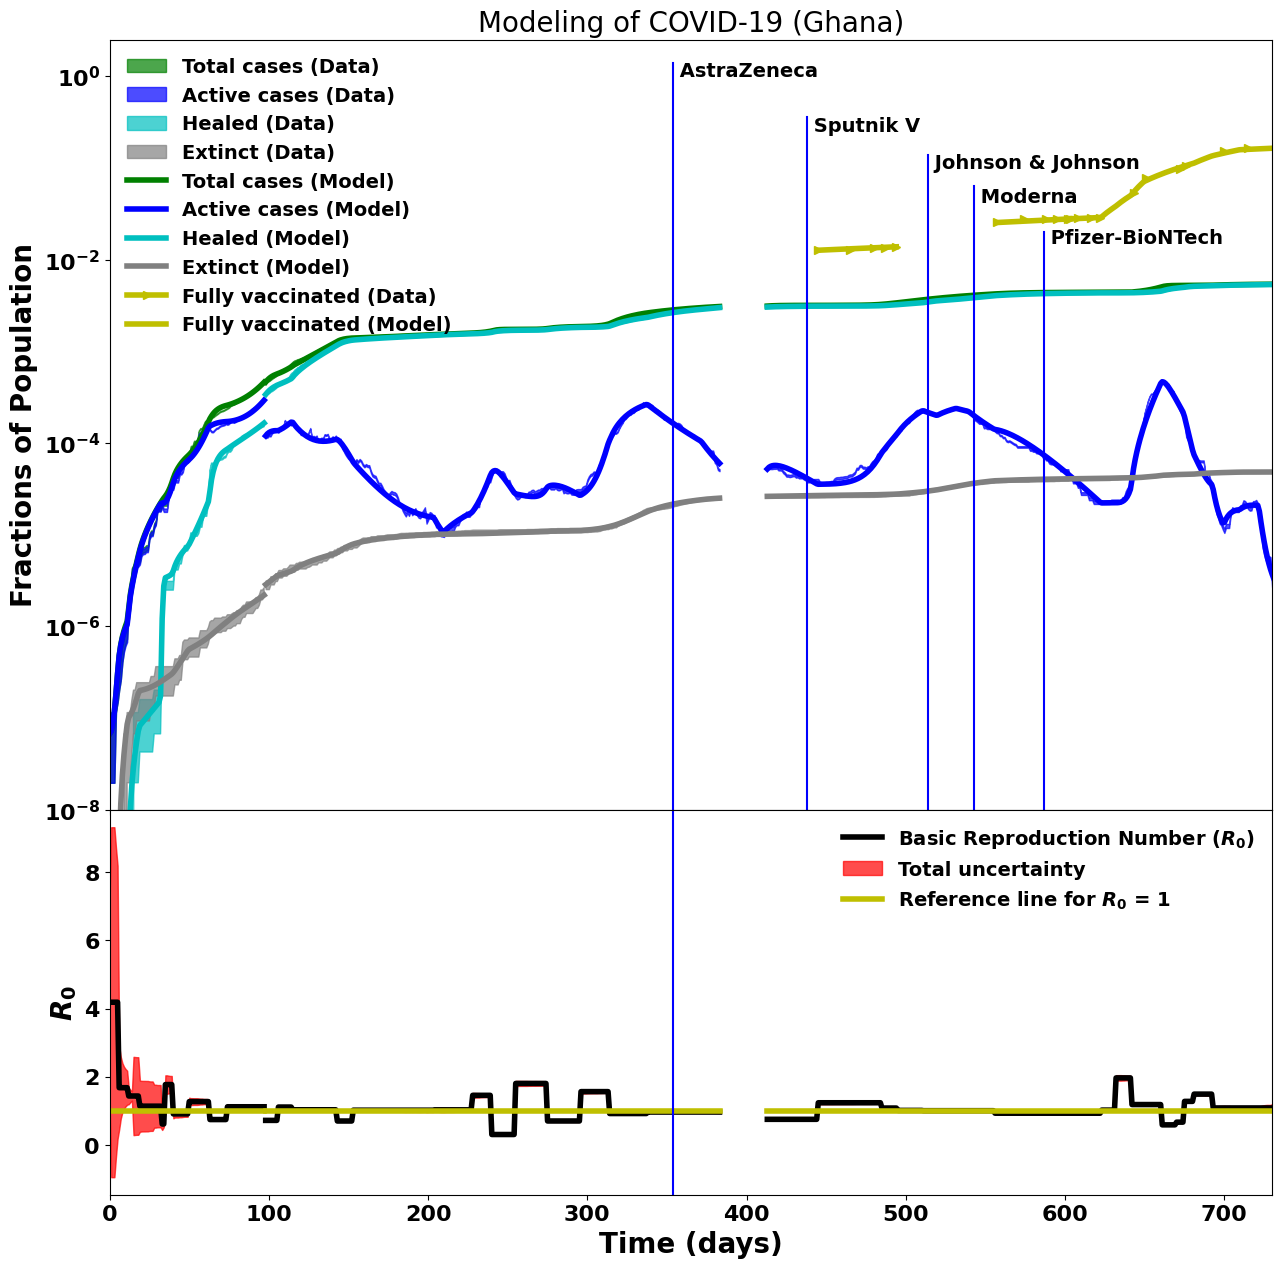

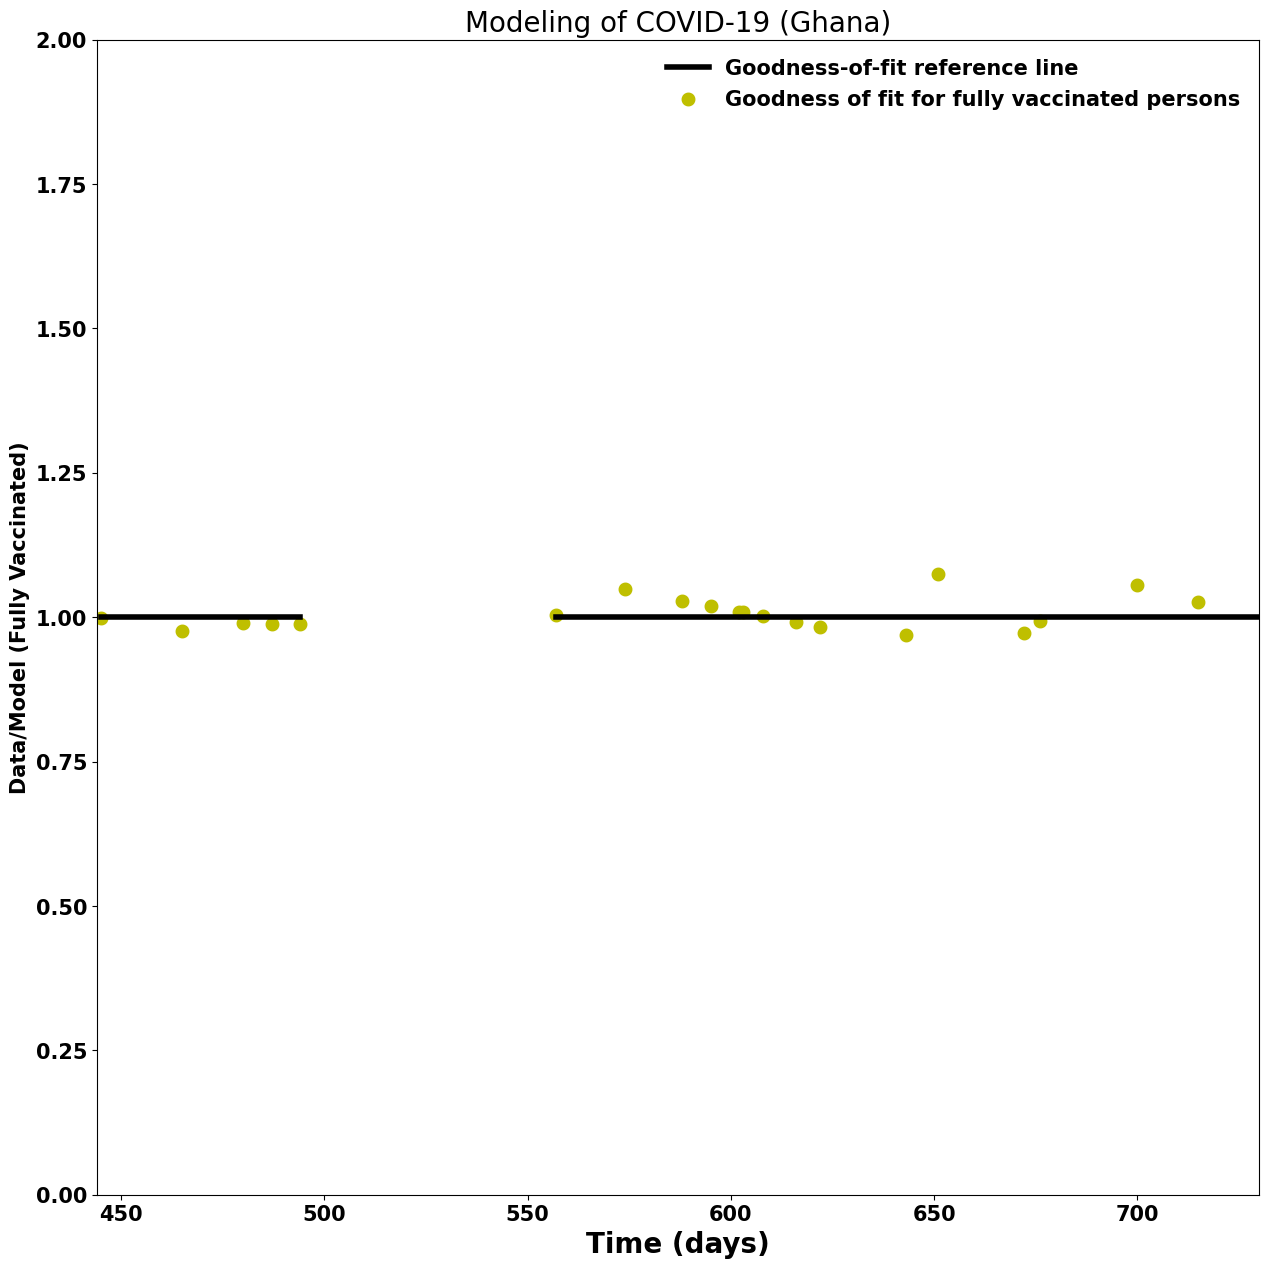

In [ ]:
################################################################################
###################  Modelling and Ro
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

ax0=plt.subplot(gs[0])
ax0.set_yscale('log')
ax0.set_xlim(0, xlim)
alpha=.7
width = 4
#plt.errorbar(t1, np.array(Dinfecteds)[t1],yerr=error_infectedf[t1],fmt='o',color='g',label='Confirmed Cases (Data)', elinewidth =4, capsize = 5, fillstyle='full')
#plt.errorbar(t2, np.array(Dinfecteds)[t2],yerr=error_infectedf[t2],fmt='o',color='g', elinewidth =4, capsize = 5, fillstyle='full')
plt.fill_between(t1, np.array(Dinfecteds)[t1] - 10**0*error_infectedf[t1], np.array(Dinfecteds)[t1] + 10**0*error_infectedf[t1], color='g', alpha=alpha, label='Total cases (Data)')
plt.fill_between(t2, np.array(Dinfecteds)[t2] - 10**0*error_infectedf[t2], np.array(Dinfecteds)[t2] + 10**0*error_infectedf[t2], color='g', alpha=alpha)
plt.fill_between(t3, np.array(Dinfecteds)[t3] - 10**0*error_infectedf[t3], np.array(Dinfecteds)[t3] + 10**0*error_infectedf[t3], color='g', alpha=alpha)
#plt.errorbar(t1 ,np.array(Dactifs)[t1],yerr=error_actif[t1],fmt='o', color='b',label='Active Cases (Data)', elinewidth =4, capsize = 5)
#plt.errorbar(t2 ,np.array(Dactifs)[t2],yerr=error_actif[t2],fmt='o', color='b', elinewidth =4, capsize = 5)
plt.fill_between(t1 ,np.array(Dactifs)[t1] - 10**0*error_actif[t1], np.array(Dactifs)[t1] + 10**0*error_actif[t1], color='b', alpha=alpha, label='Active cases (Data)')
plt.fill_between(t2 ,np.array(Dactifs)[t2] - 10**0*error_actif[t2], np.array(Dactifs)[t2] + 10**0*error_actif[t2], color='b', alpha=alpha)
plt.fill_between(t3 ,np.array(Dactifs)[t3] - 10**0*error_actif[t3], np.array(Dactifs)[t3] + 10**0*error_actif[t3], color='b', alpha=alpha)
#plt.errorbar(t1 ,np.array(Drecovereds)[t1],yerr=error_recovered[t1],fmt='o', color='c',label='Healed (Data)', elinewidth =4, capsize = 5)
#plt.errorbar(t2 ,np.array(Drecovereds)[t2],yerr=error_recovered[t2],fmt='o', color='c', elinewidth =4, capsize = 5)
plt.fill_between(t1 ,np.array(Drecovereds)[t1] - 10**0*error_recovered[t1], np.array(Drecovereds)[t1] + 10**0*error_recovered[t1], color='c', alpha=alpha, label='Healed (Data)')
plt.fill_between(t2 ,np.array(Drecovereds)[t2] - 10**0*error_recovered[t2], np.array(Drecovereds)[t2] + 10**0*error_recovered[t2], color='c', alpha=alpha)
plt.fill_between(t3 ,np.array(Drecovereds)[t3] - 10**0*error_recovered[t3], np.array(Drecovereds)[t3] + 10**0*error_recovered[t3], color='c', alpha=alpha)
#plt.errorbar(t1 ,np.array(Ddeads)[t1],yerr=error_dead[t1],fmt='o', color='gray',label='Extinct (Data)', elinewidth =4, capsize = 5)
#plt.errorbar(t2 ,np.array(Ddeads)[t2],yerr=error_dead[t2],fmt='o', color='gray', elinewidth =4, capsize = 5)
plt.fill_between(t1 ,np.array(Ddeads)[t1] - 10**0*error_dead[t1], np.array(Ddeads)[t1] + 10**0*error_dead[t1], color='gray', alpha=alpha, label='Extinct (Data)')
plt.fill_between(t2 ,np.array(Ddeads)[t2] - 10**0*error_dead[t2], np.array(Ddeads)[t2] + 10**0*error_dead[t2], color='gray', alpha=alpha)
plt.fill_between(t3 ,np.array(Ddeads)[t3] - 10**0*error_dead[t3], np.array(Ddeads)[t3] + 10**0*error_dead[t3], color='gray', alpha=alpha)

plt.plot(t1, Infected_sidarthe1, 'g',label='Total cases (Model)',linewidth=width)
plt.plot(t1, actif_sidarthe1,'b',label='Active cases (Model)',linewidth=width)
plt.plot(t1, H1,'c',label='Healed (Model)',linewidth=4)
plt.plot(t1, E1, color='gray',label='Extinct (Model)',linewidth=width)

plt.plot(t2, Infected_sidarthe2, 'g',linewidth=width)
plt.plot(t2, actif_sidarthe2,'b', linewidth=width)
plt.plot(t2, H2,'c', linewidth=width)
plt.plot(t2, E2, color='gray',linewidth=width)

plt.plot(t3, Infected_sidarthe3, 'g',linewidth=width)
plt.plot(t3, actif_sidarthe3,'b', linewidth=width)
plt.plot(t3, H3,'c', linewidth=width)
plt.plot(t3, E3, color='gray',linewidth=width)

plt.plot(t3, data_fullyvac[t3]/N, c='y', marker = '>', lw = width, label='Fully vaccinated (Data)')
#plt.scatter(t3,data_fullyvac[t3]/N ,c='y',marker='>', label='Fully Vaccinated', lw=.5)
#plt.fill_between(t3 ,np.array(Dvaccinated)[t3] - 10**0*error_fullyvac[t3], np.array(Dvaccinated)[t3] + 10**0*error_fullyvac[t3], color='k', alpha=.8)
#plt.plot(t3[x2dose_start-t3[0]:], V3[x2dose_start-t3[0]:],'y', linewidth=width)
plt.plot(t3[x2dose_start-t3[0]:gap2_start-t3[0]], V3[x2dose_start-t3[0]:gap2_start-t3[0]],'y', linewidth=width, label='Fully vaccinated (Model)')
plt.plot(t3[gap2_end+1-t3[0]:], V3[gap2_end+1-t3[0]:],'y', linewidth=width)


plt.yscale('log')#('linear')#
## Astra
plt.axvline(x1dose_start, ymax=.97, c='b')
plt.text(x1dose_start, 1, ' AstraZeneca', fontsize= 14)
## Spoki
plt.axvline(438, ymax= .9,c='b')
plt.text(438, 2.5e-1, ' Sputnik V', fontsize= 14)
## J&J
plt.axvline(514, ymax=.85, c='b')
plt.text(514, 1e-1, ' Johnson & Johnson', fontsize= 14)
## Moderna
plt.axvline(543, ymax=.81, c='b')
plt.text(543, 4.2e-2, ' Moderna', fontsize= 14)
## Pfizer
plt.axvline(587, ymax=.75, c='b')
plt.text(587, 1.5e-2, ' Pfizer-BioNTech', fontsize= 14)
#plt.xticks(fontsize=16)


ax0.set_xticklabels([])


plt.yticks(fontsize=16)
plt.yscale('log')#('linear')#
ymax = data_fullyvac.max()
plt.ylim(10**-8, 1*2.5)#0.8*np.log(ymax))
plt.ylabel('Fractions of Population',fontsize=20)
plt.title('Modeling of COVID-19 (Ghana)', fontsize=20)#+str([ r'{}:{}'.format(parm_names[i], parm[param_days][i]) for i in range(len(parm[0])) ] ), fontsize=9)

plt.legend()#(loc=2, prop={'size': 20})
plt.legend(loc=2,prop={'size':14}, frameon=False)
plt.grid(False)

#plt.savefig("Modeling of Covid-19, Mozambique", dpi=300, bbox_inches='tight')

control_days = np.ones((10, 9))*np.array([ctrl_t1, ctrl_t2, ctrl_t3, ctrl_t4, ctrl_t5, ctrl_t6, ctrl_t7, ctrl_t8, ctrl_t9])

rot=5

#### For Ro and total uncertainty

ax=plt.subplot(gs[1])#, sharex=ax0)

alpha=alpha
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.plot(t1,Ro1,'k', label=r'Basic Reproduction Number ($R_0$)', lw=width)#######################
plt.plot(t2,Ro2,'k', lw=width)
plt.plot(t3,Ro3,'k', lw=width)
plt.fill_between(t1,  Ro1- dRo1, Ro1 + dRo1, color='r', label='Total uncertainty', alpha=alpha) #############
plt.fill_between(t2, Ro2 - dRo2, Ro2 + dRo2, color='r', alpha=alpha)
plt.fill_between(t3, Ro3 - dRo3, Ro3 + dRo3, color='r', alpha=alpha)

plt.plot(t1,np.ones_like(Ro)[list(t1)],'y', lw=width, label=r'Reference line for $R_0$ = 1 ')
plt.plot(t2,np.ones_like(Ro)[list(t2)],'y', lw=width)
plt.plot(t3,np.ones_like(Ro)[list(t3)],'y', lw=width)
plt.axvline(x1dose_start, c='b')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#################################


ax.set_xlim(0, xlim)


######################################################
#plt.title('Variation of the reproduction number, $R_0$',fontsize=20)
plt.xlabel("Time (days)", fontsize=20)
#plt.ylabel("Reproduction number, $R_0$",
ax.legend(loc=1, prop={'size': 14}, frameon=False)


plt.subplots_adjust(hspace=.0)


plt.grid(False)
## Save to pdf
#fig.savefig('RoAndUncertainty.png')###--------> Ghana

#fig.savefig('ModelingOfCO fontsize=20)
plt.ylabel(r'$R_0$', fontsize=20)#, rotation=0)
plt.legend()
ax.legend(loc=1, prop={'size': 14}, frameon=False)

plt.grid(False)
## Save to pdf
#fig.savefig('RoAndUncertainty.png')###--------> Ghana

#fig.savefig('ModelingOfCOVID19GhanaShaded.png', dpi=300, bbox_inches='tight')
if vaccine_on:
    fig.savefig('ModelingOfCOVID19Ghana-V.png', dpi=300, bbox_inches='tight')
    fig.savefig('Ghana-Figure1-V.pdf', dpi=300, bbox_inches='tight')
    fig.savefig('Ghana-Figure1-V.png', dpi=300, bbox_inches='tight')
else:
    fig.savefig('ModelingOfCOVID19Ghana.png', dpi=300, bbox_inches='tight')
    fig.savefig('Ghana-Figure1.pdf', dpi=300, bbox_inches='tight')
    fig.savefig('Ghana-Figure1.png', dpi=300, bbox_inches='tight')
# =============================================================================
###############################################  R0     ###########################
###################################################################################


###################################################################################
#########################################   GOODNESS    ###########################
###################################################################################
fig = plt.figure(figsize=(15,15))
alpha=0.7
width = 4
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
ax0 = plt.subplot(111)

dt_vac = data_fullyvac#.ffill()
out_1 = np.divide(dt_vac[x2dose_start:gap2_start]/N, V3[x2dose_start-t3[0]:gap2_start-t3[0]])
out_2=np.divide(dt_vac[gap2_end+1:]/N, V3[gap2_end+1-t3[0]:])
Goodness1 = np.ones_like(out_1)
Goodness2 = np.ones_like(out_2)

t_rec1 = t3[data_fullyvac[t3].notna()]

plt.plot(t3[x2dose_start -t3[0]:gap2_start -t3[0]],Goodness1,c='k',linewidth=width, label='Goodness-of-fit reference line')
plt.plot(t3[gap2_end+1 -t3[0]:],Goodness2,c='k',linewidth=width)
ax0.scatter(t3[x2dose_start -t3[0]:gap2_start -t3[0]],out_1,c='y',linewidth=width, label='Goodness of fit for fully vaccinated persons')
ax0.scatter(t3[gap2_end+1 -t3[0]:],out_2,c='y',linewidth=width)


ax0.legend(loc=1)
ax0.legend(frameon=False, fontsize = 15)
ax0.tick_params(labelsize=15)
ax0.set_xlim(t3[x2dose_start -t3[0]]-1, xlim)
#plt.yticks(fontsize=16)

plt.title('Modeling of COVID-19 (Ghana)', fontsize=20)
plt.ylabel("Data/Model (Fully Vaccinated)",fontsize=15)
plt.xlabel("Time (days)", fontsize=20)

plt.grid(False)
plt.ylim(0, 2)
#fig.savefig('GoodnessR0Ghana-1.png')



#fig = plt.figure()
#ax = plt.subplot(111)#(222)
#ax1=plt.subplot(gs[1])

if vaccine_on:
    fig.savefig('GoodnessVacGhana-V.png', dpi=300, bbox_inches='tight')
    fig.savefig('GoodnessVacGhana-V.pdf', dpi=300, bbox_inches='tight')
else:
    fig.savefig('GoodnessVacGhana.png', dpi=300, bbox_inches='tight')
    fig.savefig('GoodnessVacGhana.pdf', dpi=300, bbox_inches='tight')
#fig.savefig('GoodnessR0LogScaleGhana.pdf')
#fig.savefig('GoodnessR0LogScaleGhana.png')


In [ ]:
type(data_active)

pandas.core.series.Series

In [ ]:
data_active.shape

(765,)

### Forwards approach

In [ ]:
# First wave
wave_onset_f = [0]
# Find on the active plots the intervals which contain a minimum
onset_in_intervals = [[200, 250], [420, 460], [600, 650]]
# Create a list of the onset days
wave_onset_f.extend([val[0] + int(data_active[val[0]: val[1]].argmin()) for val in onset_in_intervals])
print("Onset days:", wave_onset_f)

Onset days: [0, 210, 447, 618]


In [ ]:
print([data_active[val[0]: val[1]] for val in onset_in_intervals])
#print([data.loc[val[0]: val[1], "people_fully_vaccinated"] for val in onset_in_intervals])

[200     448.0
201     503.0
202     494.0
203     466.0
204     466.0
205     376.0
206     382.0
207     348.0
208     303.0
209     301.0
210     298.0
211     337.0
212     347.0
213     351.0
214     336.0
215     348.0
216     344.0
217     382.0
218     398.0
219     397.0
220     437.0
221     463.0
222     479.0
223     487.0
224     510.0
225     488.0
226     488.0
227     514.0
228     535.0
229     566.0
230     589.0
231     620.0
232     620.0
233     819.0
234     877.0
235     947.0
236     973.0
237    1018.0
238    1156.0
239    1139.0
240    1307.0
241    1469.0
242    1541.0
243    1519.0
244    1473.0
245    1321.0
246    1427.0
247    1424.0
248    1354.0
249    1205.0
Name: Active, dtype: float64, 420    1531.0
421    1531.0
422    1519.0
423    1432.0
424    1384.0
425    1313.0
426    1313.0
427    1298.0
428    1308.0
429    1325.0
430    1325.0
431    1280.0
432    1289.0
433    1256.0
434    1259.0
435    1259.0
436    1221.0
437    1197.0
438    1138.0
439

In [ ]:
data.columns

Index(['Date', 'Days', 'Confirmed', 'Active', 'Recovered', 'Dead',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'Detected', 'Severe', 'Critical'],
      dtype='object')

In [ ]:
print("FORWARD RESULTS")
print("Corresponding fully vaccinated cases :\n",data_fullyvac.fillna(method='ffill')[wave_onset_f])
print("Corresponding active cases :\n",data_active[wave_onset_f])
print("Corresponding days :\n", data.Date[wave_onset_f])
print("Ro details \n", type(Ro), Ro.shape, "\n Ro values\n", Ro[wave_onset_f])
print("Total population :", N)
herd = N *( 1 - 1/Ro[wave_onset_f])
print("Must be vaccinated at the wave onset: \n", herd)

FORWARD RESULTS
Corresponding fully vaccinated cases :
 0           NaN
210         NaN
447    376169.0
618    839770.0
Name: people_fully_vaccinated, dtype: float64
Corresponding active cases :
 0         2.0
210     298.0
447    1079.0
618     669.0
Name: Active, dtype: float64
Corresponding days :
 0      12/03/2020
210      08/10/20
447      02/06/21
618      20/11/21
Name: Date, dtype: object
Ro details 
 <class 'numpy.ndarray'> (765,) 
 Ro values
 [4.18593717 1.03323223 1.24066922 0.93457307]
Total population : 29770000.0
Must be vaccinated at the wave onset: 
 [22658092.00272376   957503.39216437  5774885.4358264  -2084116.92445828]


## Backward Appoarch

In [ ]:
# First wave
wave_onset_b = [0]
# Find on the active plots the intervals which contain a minimum
onset_in_intervals = [[200, 250], [420, 460], [600, 650]]
# Create a list of the onset days
wave_onset_b.extend([val[1] -1 - int(data_active[val[0]: val[1]].iloc[-1:0:-1].argmin()) for val in onset_in_intervals])
print("Onset days:", wave_onset_b)

Onset days: [0, 210, 448, 628]


In [ ]:
print("BACWARD RESULTS")
print("Corresponding fully vaccinated cases :\n",data_fullyvac.fillna(method='ffill')[wave_onset_b])
print("Corresponding active cases :\n",data_active[wave_onset_b])
print("Corresponding days :\n", data.Date[wave_onset_b])
print("Ro details \n", type(Ro), Ro.shape, "\n Ro values\n", Ro[wave_onset_b])
print("Total population :", N)
herd_b = N *( 1 - 1/Ro[wave_onset_b])
print("Must be vaccinated at the wave onset: \n", herd_b)

BACWARD RESULTS
Corresponding fully vaccinated cases :
 0           NaN
210         NaN
448    376169.0
628    842225.0
Name: people_fully_vaccinated, dtype: float64
Corresponding active cases :
 0         2.0
210     298.0
448    1079.0
628     669.0
Name: Active, dtype: float64
Corresponding days :
 0      12/03/2020
210      08/10/20
448      03/06/21
628      30/11/21
Name: Date, dtype: object
Ro details 
 <class 'numpy.ndarray'> (765,) 
 Ro values
 [4.18593717 1.03323223 1.24066922 1.02583799]
Total population : 29770000.0
Must be vaccinated at the wave onset: 
 [22658092.00272376   957503.39216437  5774885.4358264    749822.95125064]


In [ ]:
wave_onset_f, wave_onset_b

([0, 210, 447, 618], [0, 210, 448, 628])

In [ ]:
data_active[wave_onset_f], data_active[wave_onset_b]

(0         2.0
 210     298.0
 447    1079.0
 618     669.0
 Name: Active, dtype: float64,
 0         2.0
 210     298.0
 448    1079.0
 628     669.0
 Name: Active, dtype: float64)

In [ ]:
pd.concat

In [ ]:
Ro[wave_onset_f], Ro[wave_onset_b]

(array([4.18593717, 1.03323223, 1.24066922, 0.93457307]),
 array([4.18593717, 1.03323223, 1.24066922, 1.02583799]))

(0         2.0
 210     298.0
 447    1079.0
 618     669.0
 Name: Active, dtype: float64,
 0         2.0
 210     298.0
 448    1079.0
 628     669.0
 Name: Active, dtype: float64)

In [ ]:
data_active[431: 447]

431    1280.0
432    1289.0
433    1256.0
434    1259.0
435    1259.0
436    1221.0
437    1197.0
438    1138.0
439    1138.0
440    1152.0
441    1152.0
442    1169.0
443    1170.0
444    1170.0
445    1172.0
446    1093.0
Name: Active, dtype: float64

In [ ]:
val = onset_in_intervals[1]
val,data_active[val[0]: val[1]].iloc[-1:0:-1], -data_active[val[0]: val[1]].iloc[-1:0:-1].argmin() + val[1]-1

([420, 460],
 459    1239.0
 458    1228.0
 457    1228.0
 456    1218.0
 455    1183.0
 454    1116.0
 453    1115.0
 452    1103.0
 451    1092.0
 450    1092.0
 449    1081.0
 448    1079.0
 447    1079.0
 446    1093.0
 445    1172.0
 444    1170.0
 443    1170.0
 442    1169.0
 441    1152.0
 440    1152.0
 439    1138.0
 438    1138.0
 437    1197.0
 436    1221.0
 435    1259.0
 434    1259.0
 433    1256.0
 432    1289.0
 431    1280.0
 430    1325.0
 429    1325.0
 428    1308.0
 427    1298.0
 426    1313.0
 425    1313.0
 424    1384.0
 423    1432.0
 422    1519.0
 421    1531.0
 Name: Active, dtype: float64,
 448)